In [ ]:
"""
@Authors:                     @Email:
* Rezwanul                    rezwanul.cse@gmail.com
"""

# Problem: Real Estate House Price Prediction

Problem class: Supervised regression

Problem dataset link: [UCI Open dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/)

Problem description:

 House price prediction is a regression Problem in real estate business where new house price will predicted from previously sold houses data and their price. 

Problem Task: Have to predict house price.

# Importing libraries

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

import scipy.stats as ss

# Feature or column description

* CRIM  ->     per capita crime rate by town
* ZN    ->   proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS ->    proportion of non-retail business acres per town
* CHAS  ->    Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX   ->    nitric oxides concentration (parts per 10 million)
* RM    ->    average number of rooms per dwelling
* AGE   ->    proportion of owner-occupied units built prior to 1940
* DIS   ->    weighted distances to five Boston employment centres
* RAD   ->    index of accessibility to radial highways
* TAX   ->    full-value property-tax rate per 10,000 dollar
* PTRATIO ->   pupil-teacher ratio by town
* B     ->    1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT ->    % lower status of the population
* MEDV  ->    Median value of owner-occupied homes in 1000's dollar

In [3]:
house_data = pd.read_csv('data/data.csv')

house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
house_data.info()

# Insight: After viewing the info, we see here that their is no missing data in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null int64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [5]:
house_data.CHAS.value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [7]:
house_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C628F98>,
      dtype=object)

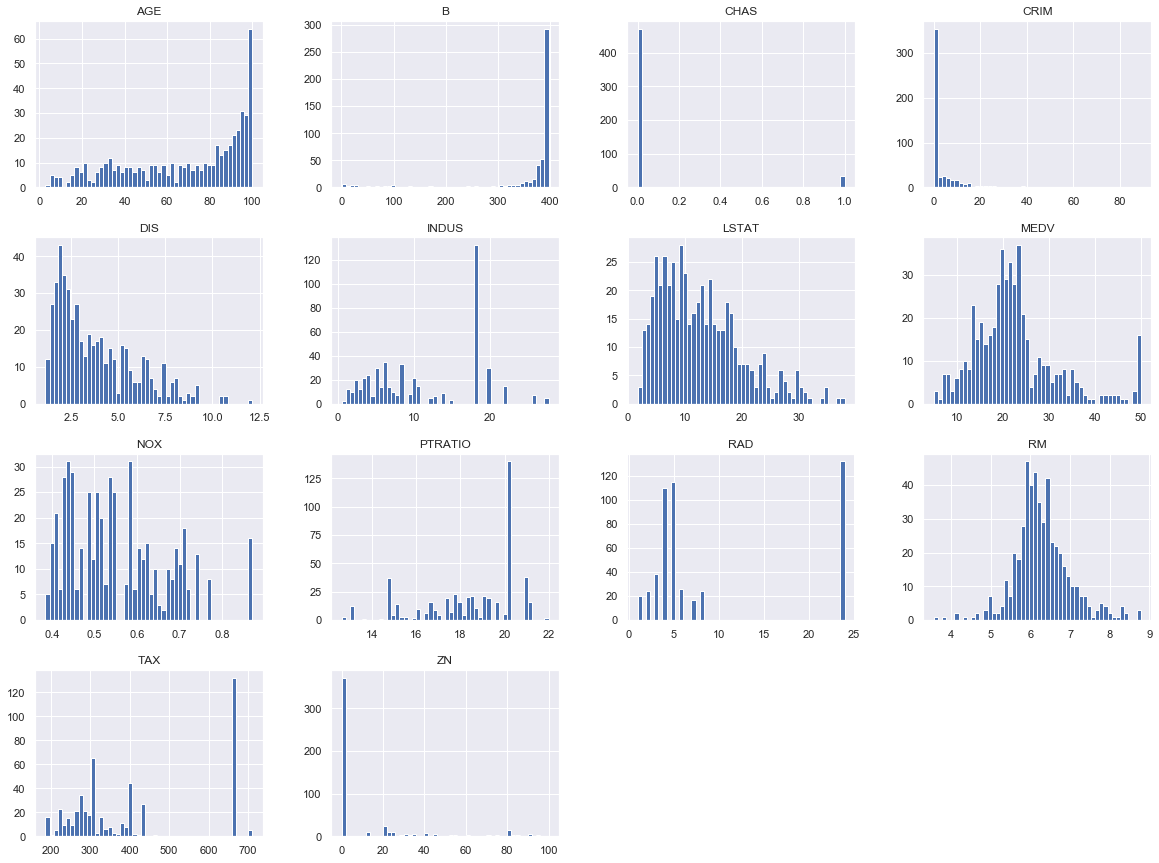

In [8]:
house_data.hist(bins=50, figsize=(20, 15))

<Figure size 432x288 with 0 Axes>

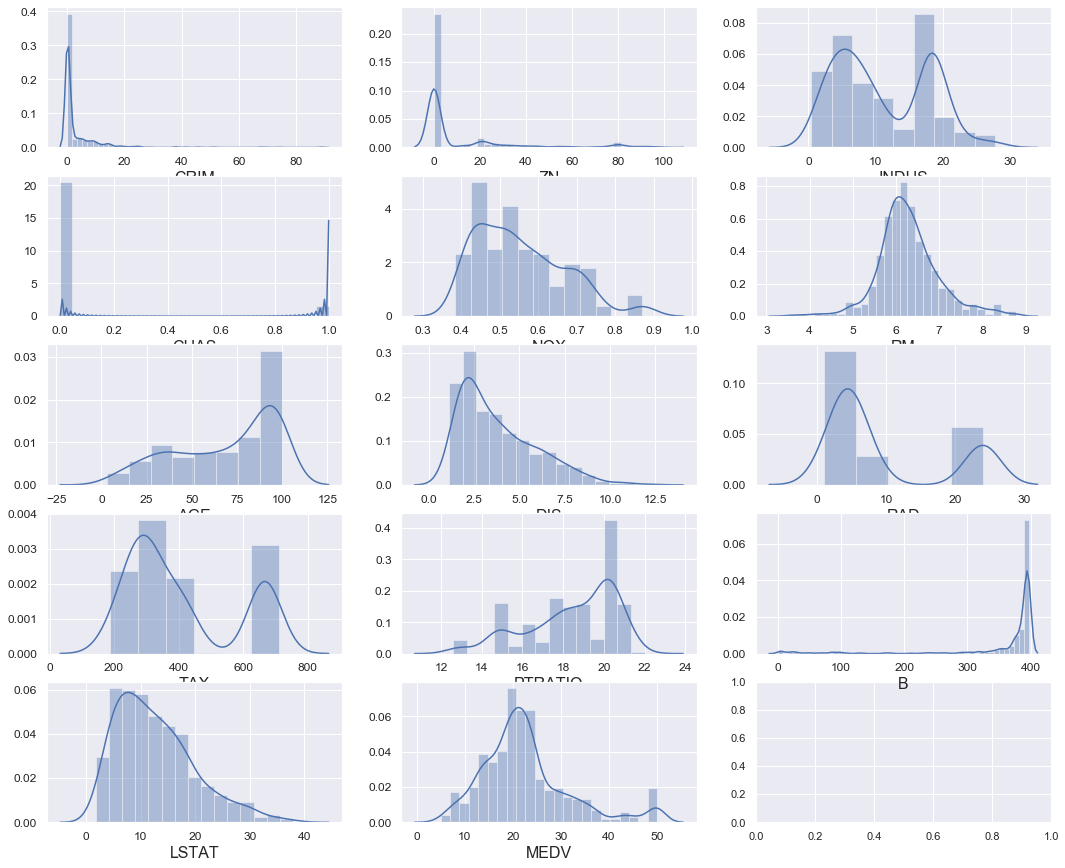

In [25]:
def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(house_data, house_data.columns)

<Figure size 432x288 with 0 Axes>

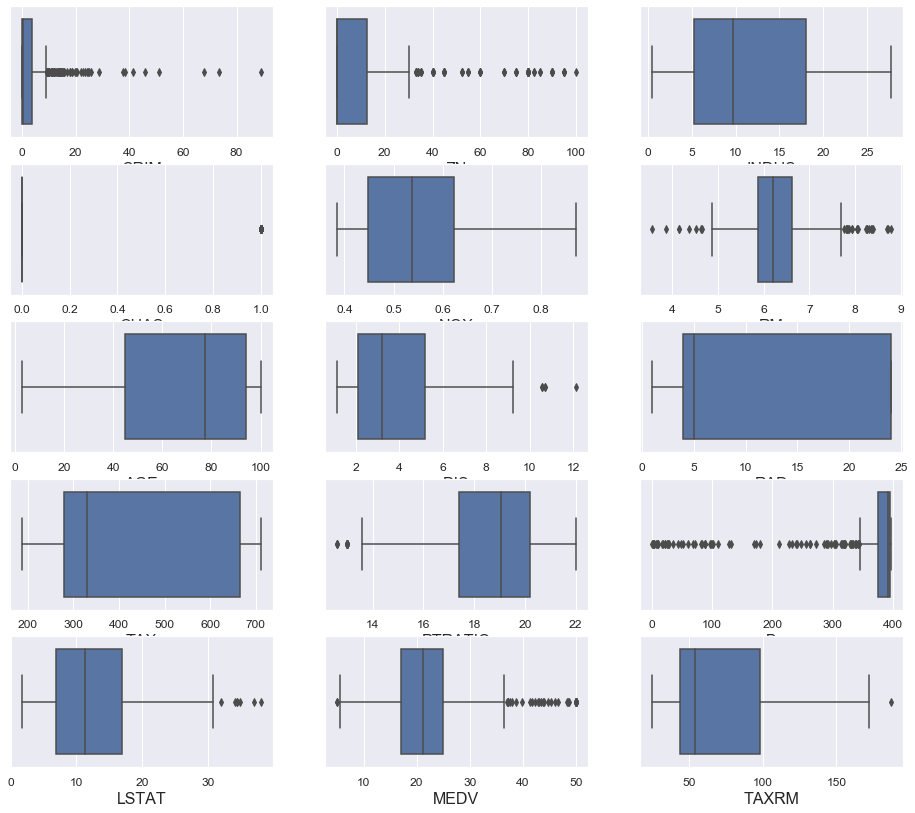

In [37]:
def plot_boxplot(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(16,14))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.boxplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_boxplot(house_data, house_data.columns)

In [14]:
X = house_data.loc[:, house_data.columns!='MEDV']
y = house_data.loc[:, house_data.columns=='MEDV']

In [17]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# print(f'Rows in train set {len(X_train)} \nRows in test set {len(X_test)}\n')

Rows in train set 404 
Rows in test set 102



In [18]:
from sklearn.model_selection import StratifiedShuffleSplit
# stratified split will divide the whole data set into almost equal percentage based on specific column in the data set.
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(house_data, house_data['CHAS']):
    strat_train_set = house_data.loc[train_index]
    strat_test_set = house_data.loc[test_index]

In [19]:
strat_train_set.CHAS.value_counts()

# 376/28 = 13.428571428571429

0    376
1     28
Name: CHAS, dtype: int64

In [20]:
strat_test_set.CHAS.value_counts()

# 95/7 = 13.571428571428571 

0    95
1     7
Name: CHAS, dtype: int64

In [ ]:
house_data = strat_train_set.copy()

## Finding correlations in the dataset columns

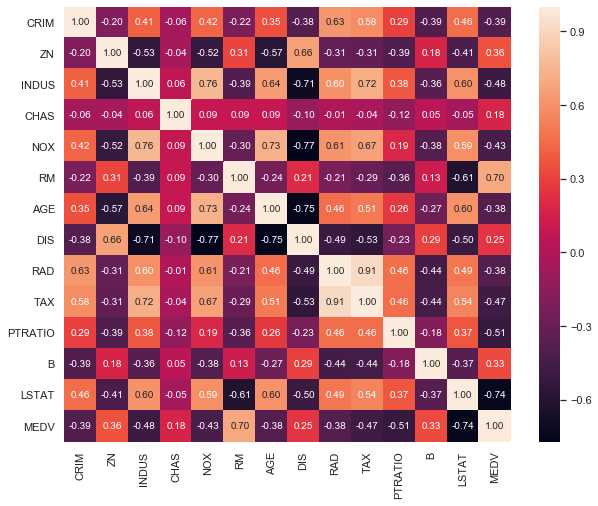

In [24]:
corr_matrix = house_data.corr()
fig, ax = plt.subplots(figsize=(10,8))  
sns.heatmap(corr_matrix, 
            xticklabels=corr_matrix.columns.values,
            yticklabels=corr_matrix.columns.values,
            annot=True, fmt=".2f");

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000F479D68>,
      dtype=object)

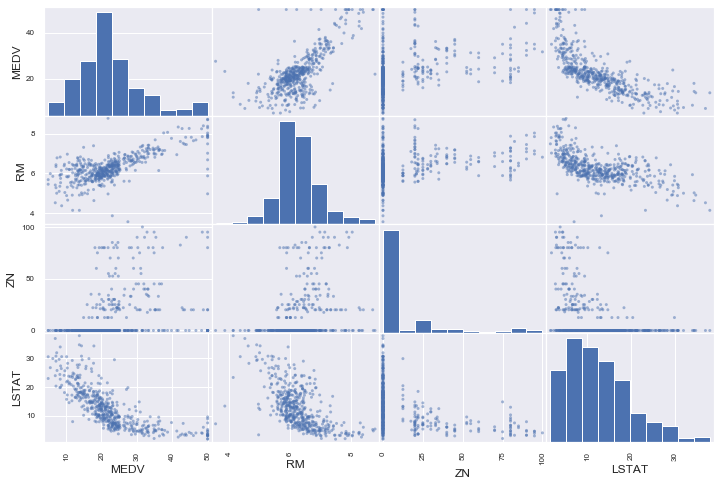

In [26]:
from pandas.plotting import scatter_matrix
attr = ["MEDV", "RM", "ZN", "LSTAT"]
scatter_matrix(house_data[attr], figsize=(12, 8))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


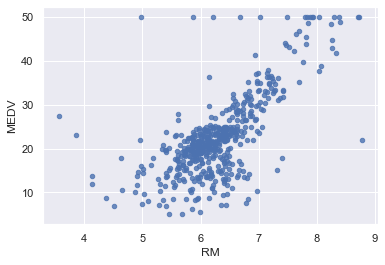

In [27]:
house_data.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

## Feature Engineering

In [28]:
# Tax per room
house_data["TAXRM"] = house_data['TAX'] / house_data['RM']

In [29]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,45.019011
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,37.688834
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,33.681280
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,31.723350
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,31.061984


In [30]:
corr_matrix = house_data.corr()
corr_matrix["MEDV"].sort_values(ascending=False)

# Insight: looks like the new feature "TAXRM" has a strong negative correlation

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
TAXRM     -0.537650
LSTAT     -0.737663
Name: MEDV, dtype: float64

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


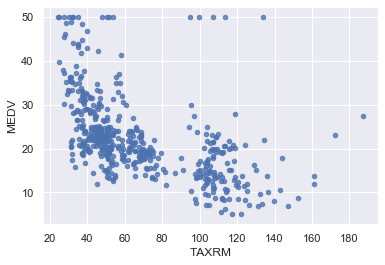

In [31]:
house_data.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.8)

In [ ]:
# house_data.describe() ## before handling missing value 

## Missing Value handling (if available in the dataset)

In [38]:
# to take care of missing attributes, there are three ways
#     1. get rid of the missing data points
#     2. get rid of the whole attributes
#     3. get the value to some value like 0, mean, median, mode

## option 1
# a = house_data.dropna(subset=['RM']) ## This will not change the original dataframe
# a.shape 
## option 2
# house_data.drop('RM', axix=1).shape  ## This will not change the original dataframe
## option 3
# house_data.RM.fillna(house_data.RM.median()) ## This will not change the original dataframe

In [ ]:
# from sklearn.impute import SimpleImputer
# imputer = SimpleImputer(strategy="median")
# imputer.fit(house_data)

# imputer.statistics_.shape

# tr_X = imputer.transform(house_data) ## return a numpy array
# house_data_tr = pd.DataFrame(tr_X, columns=house_data.columns)

# house_data_tr.describe()

## Feature scaling

Primarily, two types of scaling
1. Min-max scaling (Normalization)

    (value - min) / (max - min)
    
    sklearn provides a class called MinMaxScaler 
2. Standarization
    
    (value - mean) / std
    
    sklearn provides a class called StanderScaler

#### Scikit-learn design
Primarily, three types of objects in scikit learn
   1. Estimators - It estimates some parameter based on the dataset. Eg. SimpleImputer
   2. Transformers - transform method take input and return output based on the learning from fit
   3. Predictors - models used to predict. they all have a fit and a predict method

# Creating a pipeline